In [5]:
import networkx as nx
import numpy as np

# Bipartite graphs

## Create bipartite graph

In **bipartite graphs** all nodes are split into two sets. An edge can only exist between two nodes iff both nodes do not belong to the same set. 

E.g. sets can be *products* and *customers*.

In [33]:
# Create nodes
customers = ['cust_' + f'{i:02d}' for i in range(10)]
prods = ['prod_' + f'{i:02d}' for i in range(10)]

# Generate random edges
edges = [(np.random.choice(customers), np.random.choice(prods)) for i in range(50)]

In [36]:
# Initialize a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(customers, bipartite = 'customers')
G.add_nodes_from(prods, bipartite = 'prods')

# Add edges
G.add_edges_from(set(edges))

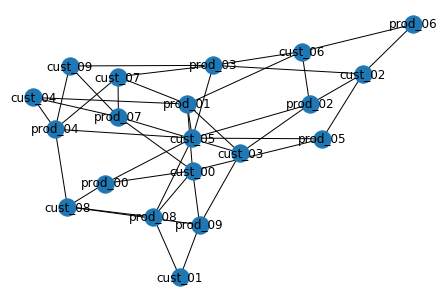

In [37]:
nx.draw(G, with_labels=True)

## Get nodes from a given partition

In [38]:
def get_nodes_from_partition(G, partition):
    
    nodes = []
    
    for n in G.nodes():
        # Check if the node belongs to a given partition
        if G.nodes[n]['bipartite'] == partition:
            nodes.append(n)
            
    return nodes

get_nodes_from_partition(G, 'customers')

['cust_00',
 'cust_01',
 'cust_02',
 'cust_03',
 'cust_04',
 'cust_05',
 'cust_06',
 'cust_07',
 'cust_08',
 'cust_09']

## Compute bipartite centrality

In [40]:
# Get partition nodes
cust_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'customers']

nx.bipartite.degree_centrality(G, cust_nodes)

{'cust_01': 0.2,
 'cust_06': 0.4,
 'cust_08': 0.4,
 'cust_02': 0.4,
 'cust_03': 0.4,
 'cust_00': 0.6000000000000001,
 'cust_09': 0.30000000000000004,
 'cust_05': 0.7000000000000001,
 'cust_07': 0.4,
 'cust_04': 0.30000000000000004,
 'prod_06': 0.2,
 'prod_00': 0.30000000000000004,
 'prod_07': 0.5,
 'prod_02': 0.4,
 'prod_08': 0.4,
 'prod_01': 0.6000000000000001,
 'prod_04': 0.5,
 'prod_05': 0.30000000000000004,
 'prod_09': 0.4,
 'prod_03': 0.5}